In [95]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [96]:
dataset = 'compas'
tg_path = f'results_{dataset}_trial_5_new.json'

with open(tg_path,'r') as f:
    summary = json.load(f)
    
print(summary)
nodebias, laftr, cfair, cfair_EO = [], [], [], []
#methods = ['nodebias', 'fair', 'laftr', 'cfair','cfair_EO', 'cfair_ours']
methods = ['nodebias', 'fair', 'laftr', 'cfair','cfair_EO']
lamb = [0.1, 1.0, 10.0, 100.0, 1000.0] if dataset == 'adult' else [0.1, 1.0, 10.0]
metrics = ['ErrGap', 'EO', 'DemoP', 'JointErr']

{'nodebias_lamb=0.1': {'ErrGap': [0.01555, 0.00843], 'JointErr': [0.6514, 0.01272], 'EO': [0.29094, 0.02356], 'DemoP': [0.30036, 0.01462], 'Lamb': [0.1, 0.0]}, 'nodebias_lamb=1.0': {'ErrGap': [0.01278, 0.00804], 'JointErr': [0.65043, 0.01392], 'EO': [0.28638, 0.01727], 'DemoP': [0.29467, 0.00954], 'Lamb': [1.0, 0.0]}, 'nodebias_lamb=10.0': {'ErrGap': [0.01356, 0.00684], 'JointErr': [0.65753, 0.00395], 'EO': [0.28324, 0.00964], 'DemoP': [0.29214, 0.00855], 'Lamb': [10.0, 0.0]}, 'laftr_lamb=0.1': {'ErrGap': [0.01993, 0.00304], 'JointErr': [0.65488, 0.00336], 'EO': [0.2516, 0.0189], 'DemoP': [0.26664, 0.01448], 'Lamb': [0.1, 0.0]}, 'laftr_lamb=1.0': {'ErrGap': [0.01294, 0.00642], 'JointErr': [0.65691, 0.00568], 'EO': [0.06103, 0.05818], 'DemoP': [0.0893, 0.05672], 'Lamb': [1.0, 0.0]}, 'laftr_lamb=10.0': {'ErrGap': [0.01961, 0.01869], 'JointErr': [0.66671, 0.03364], 'EO': [0.07478, 0.03547], 'DemoP': [0.0984, 0.04373], 'Lamb': [10.0, 0.0]}, 'cfair_lamb=0.1': {'ErrGap': [0.01873, 0.01159], 

In [97]:
tg_path = f'results_{dataset}_trial_5_new_fair.json'

with open(tg_path,'r') as f:
    fair_summary = json.load(f)

for m in fair_summary.keys():
    summary[m] = {}
    for metric in metrics:
        summary[m][metric] = fair_summary[m][metric]
    summary[m]['Lamb'] = fair_summary[m]['Lamb']

print(fair_summary)
print(summary['fair_lamb=0.1'])
    

{'fair_lamb=0.1': {'ErrGap': [0.01527, 0.00826], 'JointErr': [0.65292, 0.00177], 'EO': [0.20971, 0.00731], 'DemoP': [0.22909, 0.00702], 'Lamb': [0.1, 0.0]}, 'fair_lamb=1.0': {'ErrGap': [0.01866, 0.0086], 'JointErr': [0.65482, 0.00125], 'EO': [0.10243, 0.03881], 'DemoP': [0.12913, 0.03762], 'Lamb': [1.0, 0.0]}, 'fair_lamb=10.0': {'ErrGap': [0.0322, 0.02248], 'JointErr': [0.69236, 0.01766], 'EO': [0.09821, 0.03998], 'DemoP': [0.09727, 0.05287], 'Lamb': [10.0, 0.0]}}
{'ErrGap': [0.01527, 0.00826], 'EO': [0.20971, 0.00731], 'DemoP': [0.22909, 0.00702], 'JointErr': [0.65292, 0.00177], 'Lamb': [0.1, 0.0]}


In [98]:
for l in lamb:
    for idx in range(len(lamb)):
        m = f'nodebias_lamb={l}'
        for metric in summary[m].keys():
            if metric=='Lamb':
                continue
            summary[m][metric][0] = summary[f'nodebias_lamb=0.1'][metric][0]

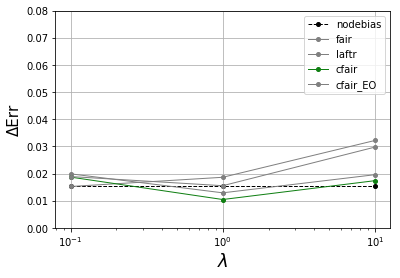

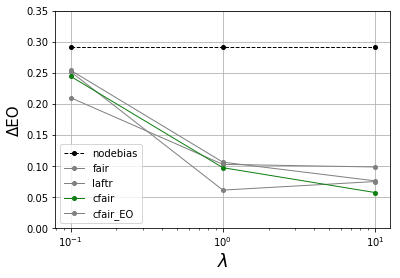

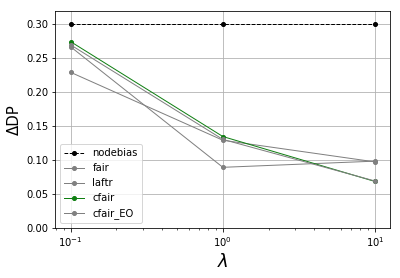

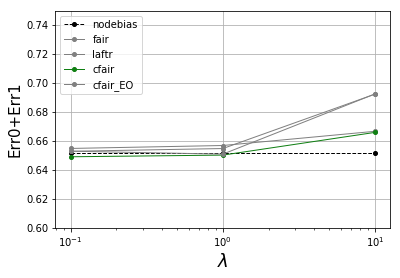

In [122]:
for metric in metrics:
    fig = plt.plot()
    plt.xscale('log')
    plt.ylabel(metric, fontsize=15)
    plt.xlabel(r'$\lambda$', fontsize=18)
    plt.grid(True)
    results = {}
    
    if dataset=='adult':
        if metric == 'ErrGap':
            y_min = 0.00
            y_max = 0.16
        elif metric == 'JointErr':
            y_min = 0.25
            y_max = 0.60
        elif metric == 'EO':
            y_min = 0.00
            y_max = 0.30
        elif metric == 'DemoP':
            y_min = 0.00
            y_max = 0.30
    
    elif dataset=='compas':
        if metric == 'ErrGap':
            y_min = 0.00
            y_max = 0.08
        elif metric == 'JointErr':
            y_min = 0.60
            y_max = 0.75
        elif metric == 'EO':
            y_min = 0.00
            y_max = 0.35
        elif metric == 'DemoP':
            y_min = 0.00
            y_max = 0.32
    
    plt.ylim([y_min, y_max])
    
    for m in methods:
        results[m] = [0 for _ in range(len(lamb))]
        
    # add fair
    results['fair'] = [0 for _ in range(len(lamb))]

    for key in summary.keys():
        lamb_value = summary[key]['Lamb'][0]
        method = key.split('_lamb')[0] 
        if method == 'cfair_ours':
            continue
        
        idx = round(math.log(lamb_value, 10)+1)
        results[method][idx] = summary[key][metric][0]

    for method in methods:
        l_style = '--' if method == 'nodebias' else '-'
        if method == 'nodebias':
            colorStr = "#000000"
        elif method == 'cfair':
            colorStr = "#0F7F12"
        else:
            colorStr = "#808080"  
#         elif method == 'cfair_EO':
#             colorStr = "#0b24fb"
#         elif method == "laftr":
#             colorStr = "#bd1bbd"
#         elif method == "fair":
#             colorStr = "#fc0d1b"  
            
        if metric == 'ErrGap':
            ylabel = "ΔErr"
        elif metric == 'EO':
            ylabel = "ΔEO"
        elif metric == 'DemoP':
            ylabel = "ΔDP"
        elif metric == 'JointErr':
            ylabel = "Err0+Err1"
        plt.ylabel(ylabel)
        plt.plot(lamb, results[method], label=method, linestyle=l_style, color = colorStr, marker='o', linewidth=1, markersize=4)
    plt.legend()
    plt.savefig(f'{dataset}_results_{metric}_highlight.png')
    plt.show()

In [66]:
print(results['fair_lamb=0.1'])

KeyError: 'fair_lamb=0.1'